# importing the libraries 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import os
from pyclustering.cluster.kmedoids import kmedoids
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
#import plotly.graph_objects as go
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage

 Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster.I will divide customers into segments to optimize the significance of each customer to the business. Retail marketing is the process by which retailers promote awareness and interest of their goods and services in an effort to generate sales from their consumers. 


Market segementation: It is a process by which the customers are divided into identifiable groups based on their product or service requirements. Market segmentation is very useful for the marketing force of the retail organization to create a custom marketing mix for specific groups.

The Online Retail a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Customer segmentation: Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.


Market basket analysis: Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering. The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

Clustering is one of the most common unsupervised learning methods. The method of clustering involves organizing unlabelled data into similar groups called clusters. Thus, a cluster is a collection of similar data items. The primary goal here is to find similarities in the data points and group similar data points into a cluster.

Three clusters, poor (less spending), medium(medium spending), rich (high spending) or age and spending score, see if there is a connection between age and spending. Four clusters where age groups between 18-30 30-40 40-50 50-60 and how much they spend

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

Who are your target customers with whom you can start marketing strategy [easy to converse] sahl eny akn3hom yshtro

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.

# read and show the data 

In [10]:
data=pd.read_csv('C:\\Users\\manar\\OneDrive\\Desktop\\DATAMINING\\Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# adjusting the data 

In [11]:
data.drop(['CustomerID'],axis='columns',inplace=True) 

In [12]:
data['Age']=data['Age'].astype(float)
data['Annual Income (k$)']=data['Annual Income (k$)'].astype(float)
data.dtypes

Gender                     object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

# To turn gender to numeric

In [13]:
encoder = LabelEncoder()

data["Gender"] = encoder.fit_transform(data["Gender"])

gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}
gender_mapping

{0: 'Female', 1: 'Male'}

# Male vs Female
using bar plot to compare between spending score between males and femals 

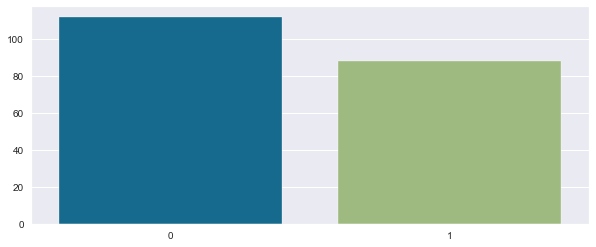

In [14]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

using bar plot to see the amount of customers in each age range 

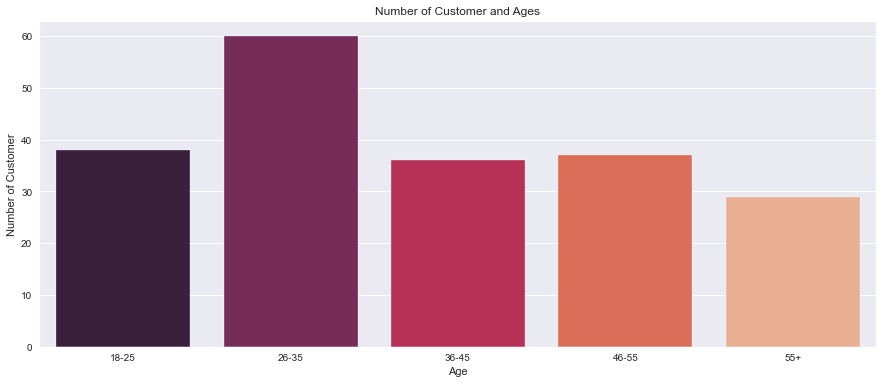

In [15]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# using bar plot to see the amount of customers in each annual income range

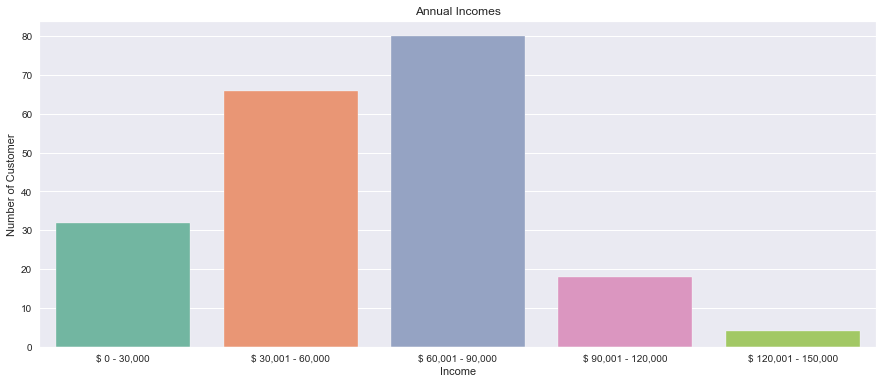

In [16]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# K-medoids
determining the number of clusters '5' , using the manhattan distance 

In [17]:
km =KMedoids(n_clusters=5,metric='manhattan', random_state=0)
km.fit(data)
data["Cluster"]=km.fit_predict(data)

In [18]:
data["Cluster"]  #showing each data in which cluster

0      0
1      3
2      0
3      3
4      0
      ..
195    4
196    2
197    4
198    2
199    4
Name: Cluster, Length: 200, dtype: int64

In [19]:
data  #showing data 

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19.0,15.0,39,0
1,1,21.0,15.0,81,3
2,0,20.0,16.0,6,0
3,0,23.0,16.0,77,3
4,0,31.0,17.0,40,0
...,...,...,...,...,...
195,0,35.0,120.0,79,4
196,0,45.0,126.0,28,2
197,1,32.0,126.0,74,4
198,1,32.0,137.0,18,2


# plotting the output from the algorithm 

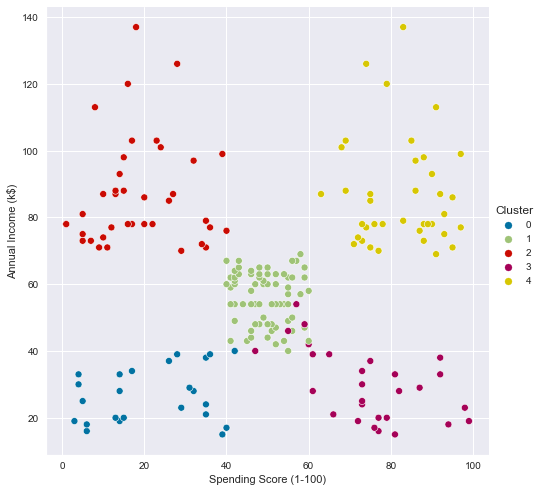

In [20]:
sns.relplot(
    x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', data=data, height=7,palette=sns.color_palette( n_colors=5)) #to plot the clusters 

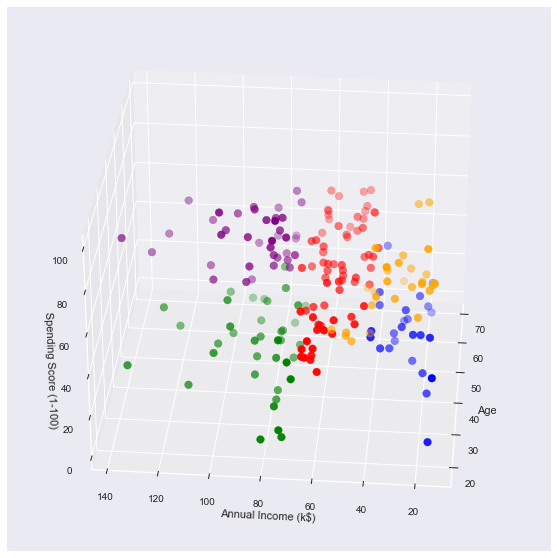

In [21]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.Cluster == 0], data["Annual Income (k$)"][data.Cluster == 0], data["Spending Score (1-100)"][data.Cluster == 0], c='blue', s=60)
ax.scatter(data.Age[data.Cluster == 1], data["Annual Income (k$)"][data.Cluster == 1], data["Spending Score (1-100)"][data.Cluster == 1], c='red', s=60)
ax.scatter(data.Age[data.Cluster == 2], data["Annual Income (k$)"][data.Cluster == 2], data["Spending Score (1-100)"][data.Cluster == 2], c='green', s=60)
ax.scatter(data.Age[data.Cluster == 3], data["Annual Income (k$)"][data.Cluster == 3], data["Spending Score (1-100)"][data.Cluster == 3], c='orange', s=60)
ax.scatter(data.Age[data.Cluster == 4], data["Annual Income (k$)"][data.Cluster == 4], data["Spending Score (1-100)"][data.Cluster == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Naive Bayes

In [22]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19.0,15.0,39,0
1,1,21.0,15.0,81,3
2,0,20.0,16.0,6,0
3,0,23.0,16.0,77,3
4,0,31.0,17.0,40,0
...,...,...,...,...,...
195,0,35.0,120.0,79,4
196,0,45.0,126.0,28,2
197,1,32.0,126.0,74,4
198,1,32.0,137.0,18,2


In [24]:
inputs = data.drop('Cluster',axis='columns') #separating the target column 
target = data.Cluster #separating the target column

In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3) #train test split is used to split data test size b 30%

In [26]:
model = GaussianNB()

In [28]:
model.fit(X_train,y_train)

GaussianNB()

In [29]:
y_predict=model.predict(X_test) #predicted values

In [32]:
y_predict

array([3, 4, 1, 2, 3, 0, 2, 4, 1, 1, 4, 1, 1, 3, 4, 1, 2, 3, 1, 2, 4, 3,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 4, 1, 3, 1, 3, 0, 4, 4, 0, 1, 4, 1, 2, 1, 3], dtype=int64)

In [33]:
scores= cross_val_score(GaussianNB(),X_train, y_train, cv=5) # 5 tagarob so 5 accuracy 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.05
